# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    ans = (x**2)*np.sin(x)
    return ans

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    anint1 = 2*x*np.sin(x)
    anint2 = (x**2-2)*np.cos(x)
    constant = -2
    anintT = anint1 - anint2 +constant
    
    return anintT

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    ans = g(xmax)-g(xmin)
    return ans


Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [12]:
xmax = 4
xmin = 0

list1 = np.linspace(xmin,xmax,3)
print(list1)

#for i = 1:2*N+1

    

[0. 2. 4.]


In [13]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    xes = np.linspace(xmin,xmax,(2*N)+1)
    panel_width = (xmax-xmin)/(2*N)
    integral1 =  f(xmin)+f(xmax)
    integral2 = 4*sum(f(xes[1:2*N:2]))
    integral3 = 2*sum(f(xes[2:2*N:2]))
    integralT = (panel_width/3)*(integral1+integral2+integral3)                         
    print (integralT)
    return integralT

Make sure you have implemented Simpson's rule correctly:

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

1.6266126028560373


In [15]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

1.0965909955991098


## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


2.4690909838319284
2.469459200257431
2.4694818744619678
2.469483286359016
2.469483374520932
2.469483380029777
2.4694833803740606
2.4694833803955754


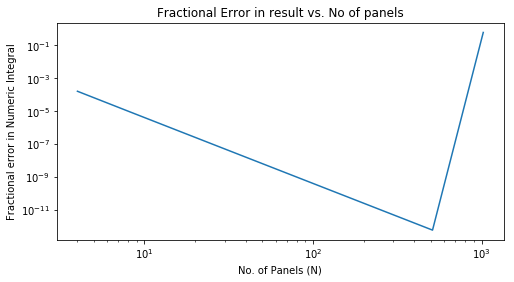

In [20]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
numints = np.empty(len(panel_counts));

for i in range(len(panel_counts)-1):
    numintnow = integrate_numeric(x0,x1,panel_counts[i])
    numints[i] = numintnow

anints = np.ones(len(panel_counts))*result_analytic
frac_differences = abs(numints-anints)/result_analytic

plt.figure(figsize=(8, 4))
plt.plot(panel_counts,frac_differences)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('No. of Panels (N)')
plt.ylabel('Fractional error in Numeric Integral')
plt.title('Fractional Error in result vs. No of panels')

plt.show()


2.4690909838319284
2.469459200257431
2.4694818744619678
2.469483286359016
2.469483374520932
2.469483380029777
2.4694833803740606
2.4694833803955754


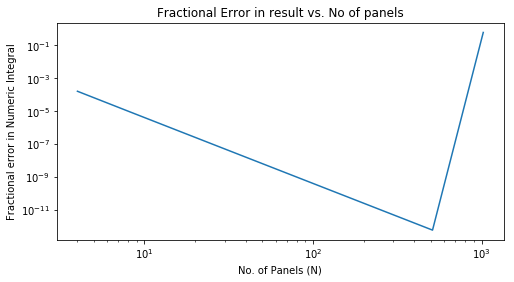

In [21]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
numints = np.empty(len(panel_counts));

for i in range(len(panel_counts)-1):
    numintnow = integrate_numeric(x0,x1,panel_counts[i])
    numints[i] = numintnow

anints = np.ones(len(panel_counts))*result_analytic
frac_differences = abs(numints-anints)/result_analytic

plt.figure(figsize=(8, 4))
plt.plot(panel_counts,frac_differences)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('No. of Panels (N)')
plt.ylabel('Fractional error in Numeric Integral')
plt.title('Fractional Error in result vs. No of panels')

plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

YOUR ANSWER HERE

If the trapezium rule was being used, how would the panel
count affect accuracy? 

YOUR ANSWER HERE